## USGS Earthquake Data Mapping

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag = magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

In [2]:
# importing libraries 

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# importing data

raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')

In [4]:
raw_eqk.head(3)

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake


In [5]:
raw_eqk.id.nunique()

120108

In [6]:
raw_eqk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   id         120108 non-null  object 
 6   place      120108 non-null  object 
 7   type       120108 non-null  object 
dtypes: float64(4), object(4)
memory usage: 7.3+ MB


## Data selection


In [7]:
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

In [14]:
# filtering for type earthquake and magnitude greater than or equal to 6.5
eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag >= 6.5)]
              
              

crs is WGS84

In [15]:
eqk = gpd.GeoDataFrame( eqk, # data for geo-dataFrame
                                # specify/create a geometry column
                                geometry = gpd.points_from_xy(eqk.longitude,
                                                              eqk.latitude),
                                # specify CRS
                                crs='EPSG:4326'
                               )

In [17]:
type(eqk)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

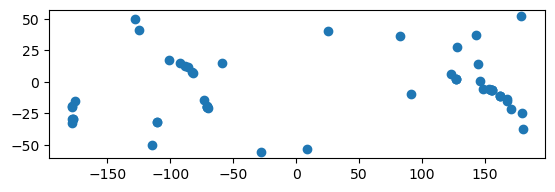

In [16]:
eqk.plot()

## Import low-res countries polygons

In [18]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [19]:
worldmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Map

In [20]:
# checking the total number of values to scale our colorbar by
eqk.mag.nunique()

15

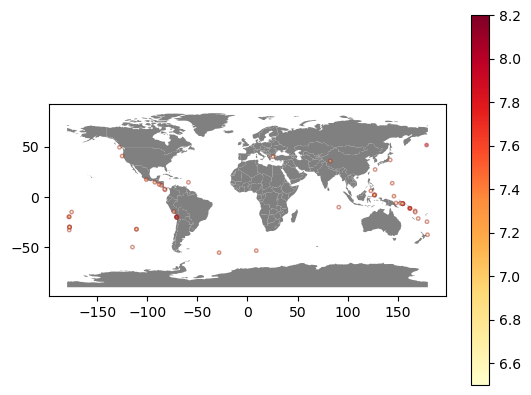

In [41]:
fig, ax = plt.subplots()

# world map layer
worldmap.plot(ax=ax,
              color='grey')

# adding earthuakes colored by magnitude

eqk.plot(ax=ax,
         column='mag',
         legend=True, # add legend
         markersize=6, # adjust point size
         cmap='YlOrRd', # continuous colorscale from orange to red
         edgecolor='brown',
         alpha=0.5
        )

plt.show()